In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def read_file(filename):
    img = cv2.imread(filename)
    if img is None:
        print(f"Error: Unable to load image '{filename}'. Check the file path and try again.")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [9]:
filename = "image.jpg"
img = read_file(filename)

org_img = np.copy(img)

# Create Edge Mask

In [10]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

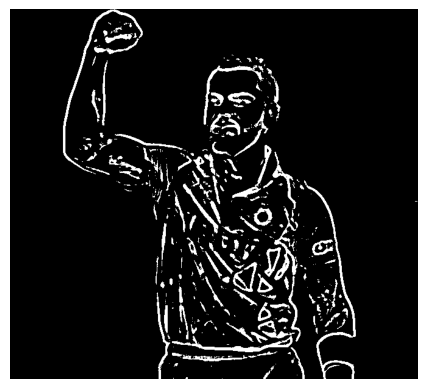

In [11]:
filename = "image.jpg"
img = read_file(filename)
if img is not None:
    line_size, blur_value = 9, 7
    edges = edge_mask(img, line_size, blur_value)

    plt.imshow(edges, cmap='binary')
    plt.axis('off') 
    plt.show()


# Reduce the Color Palette

In [12]:
def color_quantization(img, k):
    #Tranform the image
    data = np.float32(img).reshape((-1,3))
    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    #Implementing K-means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

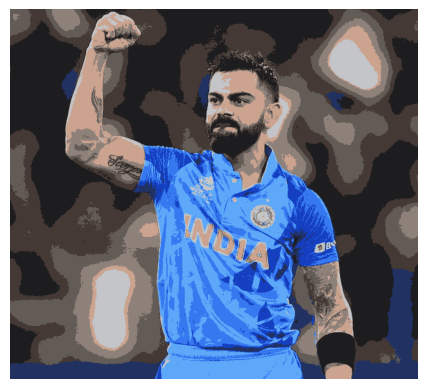

In [13]:
img = color_quantization(img, k=10)
plt.imshow(img) 
plt.axis('off')
plt.show()

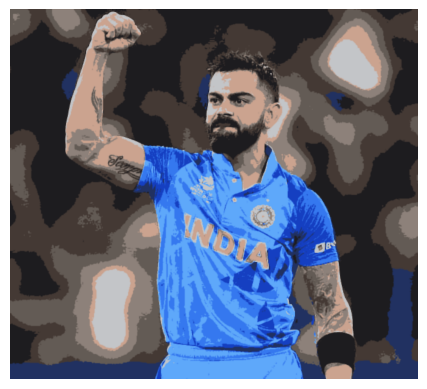

In [14]:
# Reduce the noise
blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.axis('off')
plt.show()

# Combine Edge Mask with the quantiz img

In [15]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask = edges)

    plt.imshow(org_img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.axis('off')
    plt.show()


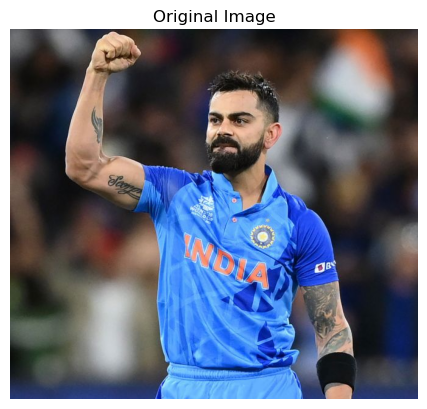

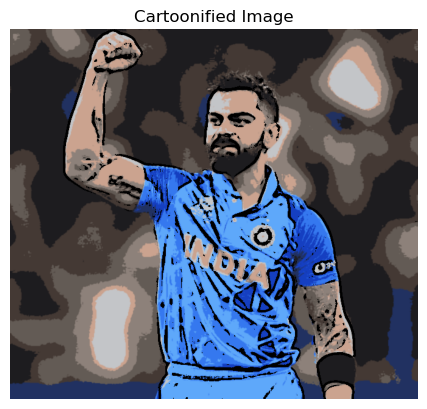

In [16]:
cartoon()